In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm

## Attack result

In [2]:
glob_dataset_name = 'UCR'
os.listdir(f'results/TS2Vec/{glob_dataset_name}')

['rej_curves_dict_model_ToeSegmentation2_1_adv.pickle',
 'rej_curves_dict_model_GunPointMaleVersusFemale_3_adv.pickle',
 'rej_curves_dict_model_SemgHandGenderCh2_3_adv.pickle',
 'rej_curves_dict_model_SonyAIBORobotSurface1_1.pickle',
 'aa_res_Wafer_1.csv',
 'rej_curves_dict_model_FreezerSmallTrain_2.pickle',
 'aa_res_MiddlePhalanxOutlineCorrect_0_adv.csv',
 'aa_res_DodgerLoopGame_2_adv.csv',
 'aa_res_SonyAIBORobotSurface2_4_adv.csv',
 'rej_curves_dict_model_MoteStrain_3.pickle',
 'aa_res_DodgerLoopWeekend_3.csv',
 'rej_curves_dict_model_SonyAIBORobotSurface1_0_adv.pickle',
 'rej_curves_dict_model_MoteStrain_2_adv.pickle',
 'aa_res_Ham_3.csv',
 'aa_res_SonyAIBORobotSurface1_3_adv.csv',
 'aa_res_ECGFiveDays_3_adv.csv',
 'rej_curves_dict_model_WormsTwoClass_4.pickle',
 'rej_curves_dict_model_Lightning2_2_adv.pickle',
 'aa_res_GunPointAgeSpan_4.csv',
 'rej_curves_dict_model_HandOutlines_2_adv.pickle',
 'aa_res_ProximalPhalanxOutlineCorrect_1_adv.csv',
 'rej_curves_dict_model_MiddlePhalanxO

In [3]:
res_df_all = pd.DataFrame([])

glob_dataset_name = 'UCR'
path = f'results/TS2Vec/{glob_dataset_name}'
for df_name in tqdm(os.listdir(path)):
    if '.csv' in df_name:  
        adv_status = 'adv' in df_name
        
        model_id = int(df_name[-5-adv_status*4 : -4-adv_status*4])
        res_df = pd.read_csv(path + '/' + df_name, index_col=0)
        res_df['dataset_name'] = df_name[7:-6 - adv_status*4]
        res_df['global_name'] = glob_dataset_name
        res_df['adv'] = adv_status
        res_df['model_id'] = model_id
        res_df_all = pd.concat([res_df_all, res_df])

res_df_all = res_df_all.rename(columns={'n steps': 'step'})
res_df_all.head()

  0%|          | 0/840 [00:00<?, ?it/s]

,step,ACC,ROC AUC,PR AUC,eps,dataset_name,global_name,adv,model_id
0,0,0.989779,0.994272,0.998764,0.001,Wafer,UCR,False,1
1,1,0.989779,0.994272,0.998764,0.001,Wafer,UCR,False,1
2,2,0.989617,0.994181,0.998744,0.001,Wafer,UCR,False,1
3,3,0.989455,0.993429,0.998563,0.001,Wafer,UCR,False,1
4,4,0.989455,0.993429,0.998563,0.001,Wafer,UCR,False,1


In [4]:
res_df_all.shape

(107100, 9)

In [5]:
res_df_all = res_df_all.groupby(['dataset_name', 'global_name', 'adv', 'step', 'eps'], as_index=False)['ACC', 'ROC AUC', 'PR AUC'].mean()

<ipython-input-5-2e4a87ec7cbc>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  res_df_all = res_df_all.groupby(['dataset_name', 'global_name', 'adv', 'step', 'eps'], as_index=False)['ACC', 'ROC AUC', 'PR AUC'].mean()


In [6]:
res_df_all

,dataset_name,global_name,adv,step,eps,ACC,ROC AUC,PR AUC
0,BeetleFly,UCR,False,0,0.001000,0.790000,0.79000,0.770000
1,BeetleFly,UCR,False,0,0.005623,0.790000,0.79000,0.770000
2,BeetleFly,UCR,False,0,0.031623,0.790000,0.79000,0.770000
3,BeetleFly,UCR,False,0,0.177828,0.790000,0.79000,0.770000
4,BeetleFly,UCR,False,0,1.000000,0.790000,0.79000,0.770000
...,...,...,...,...,...,...,...,...
21415,Yoga,UCR,True,50,0.001000,0.049467,0.04993,0.519031
21416,Yoga,UCR,True,50,0.005623,0.000000,0.00000,0.535667
21417,Yoga,UCR,True,50,0.031623,0.000000,0.00000,0.535667
21418,Yoga,UCR,True,50,0.177828,0.000000,0.00000,0.535667


In [14]:
steps_to_save = [0, 10]
eps_save = res_df_all['eps'].unique()[1]
metric = 'ACC'
global_ds_name = ['UEA', 'UCR']
adv_stat = True

res_df_metric_mask1 = res_df_all.query('step in @steps_to_save and global_name in @global_ds_name')

res_df_metric_all = pd.DataFrame([])

for adv_stat in [True, False]:
    mask2 = (res_df_metric_mask1['eps'] == eps_save) & (res_df_metric_mask1['adv'] == adv_stat)
    res_df_metric = res_df_metric_mask1[mask2][['dataset_name', metric, 'step']].copy()
    res_df_metric = res_df_metric.pivot(index="dataset_name", columns="step",values="ACC").reset_index()
    
    res_df_metric = res_df_metric.rename(columns=dict(zip(steps_to_save, ['original', 'attacked'])))
    res_df_metric['adv_train'] = adv_stat
    res_df_metric_all = pd.concat([res_df_metric_all, res_df_metric])

res_df_metric = res_df_metric_all
res_df_metric.head()

step,dataset_name,original,attacked,adv_train
0,BeetleFly,0.770000,0.500000,True
1,BirdChicken,0.740000,0.550000,True
2,Chinatown,0.910787,0.795335,True
3,Coffee,0.971429,0.292857,True
4,Computers,0.643200,0.126400,True


In [15]:
res_df_metric_meld = res_df_metric.melt(id_vars=['dataset_name', 'adv_train'], value_vars=['original', 'attacked'], 
                                        var_name='attack', value_name=metric)
res_df_metric_meld['attack'] = res_df_metric_meld['attack'].apply(lambda x: x=='attacked')
res_df_metric_meld

,dataset_name,adv_train,attack,ACC
0,BeetleFly,True,False,0.770000
1,BirdChicken,True,False,0.740000
2,Chinatown,True,False,0.910787
3,Coffee,True,False,0.971429
4,Computers,True,False,0.643200
...,...,...,...,...
163,TwoLeadECG,False,True,0.573661
164,Wafer,False,True,0.966450
165,Wine,False,True,0.000000
166,WormsTwoClass,False,True,0.319481


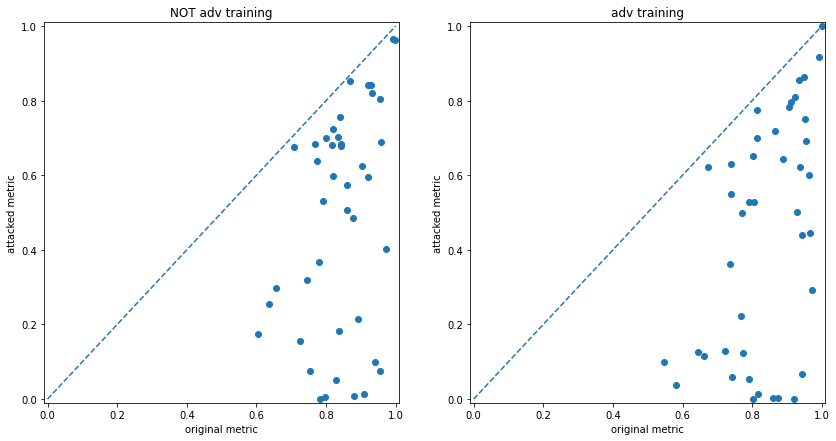

In [16]:
plt.figure(figsize=(14, 7))


plt.subplot(1, 2, 1)
X = res_df_metric_meld[(~res_df_metric_meld.adv_train) & (~res_df_metric_meld.attack)]['ACC']
Y = res_df_metric_meld[(~res_df_metric_meld.adv_train) & (res_df_metric_meld.attack)]['ACC']

plt.title('NOT adv training')
plt.scatter(X, Y)
plt.plot(np.linspace(0, 1, 30), np.linspace(0, 1, 30), ls='--')
plt.xlabel('original metric')
plt.ylabel('attacked metric')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])


plt.subplot(1, 2, 2)
X = res_df_metric_meld[(res_df_metric_meld.adv_train) & (~res_df_metric_meld.attack)]['ACC']
Y = res_df_metric_meld[(res_df_metric_meld.adv_train) & (res_df_metric_meld.attack)]['ACC']

plt.title('adv training')
plt.scatter(X, Y)
plt.plot(np.linspace(0, 1, 30), np.linspace(0, 1, 30), ls='--')
plt.xlabel('original metric')
plt.ylabel('attacked metric')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])

plt.show()

/cephfs/projects/psoker/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/cephfs/projects/psoker/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/cephfs/projects/psoker/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

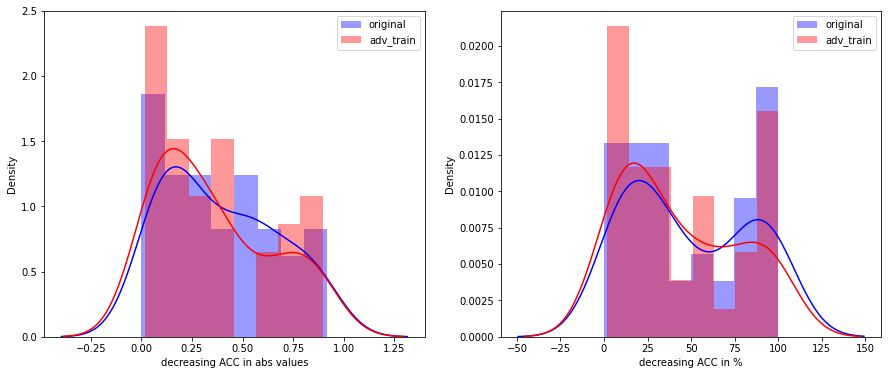

In [17]:
res_df_metric['diff_attack'] = res_df_metric['original'] - res_df_metric['attacked']
res_df_metric['diff_attack_pct'] = res_df_metric['diff_attack']/res_df_metric['original'] * 100
res_df_metric_adv = res_df_metric


plt.figure(figsize=(15, 6))
plt.title(f'Распределение падения {metric} после адверсальных атак\nс eps {round(eps_save, 4)} на итерации {steps_to_save[1]} для моделей на обычном датасете')

plt.subplot(1, 2, 1)
sns.distplot(res_df_metric[res_df_metric['adv_train']]['diff_attack'], bins = 8, color='blue', label='original')
sns.distplot(res_df_metric[~res_df_metric['adv_train']]['diff_attack'], bins = 8, color='red', label='adv_train')
#plt.title(f'снижение {metric} в абсолютных единицах')
plt.legend()
plt.xlabel(f'decreasing {metric} in abs values')

plt.subplot(1, 2, 2)
sns.distplot(res_df_metric[res_df_metric['adv_train']]['diff_attack_pct'], bins = 8, color='blue', label='original')
sns.distplot(res_df_metric[~res_df_metric['adv_train']]['diff_attack_pct'], bins = 8,  color='red', label='adv_train')
#plt.title(f'снижение {metric} в %')
plt.legend()
plt.xlabel(f'decreasing {metric} in %')

plt.show()

In [21]:
res_df_metric[res_df_metric['adv_train']]['diff_attack'].mean(), res_df_metric[~res_df_metric['adv_train']]['diff_attack'].mean()

(0.39256335703703965, 0.357298005875201)

In [22]:
res_df_metric[res_df_metric['adv_train']]['diff_attack_pct'].mean(), res_df_metric[~res_df_metric['adv_train']]['diff_attack_pct'].mean()

(48.60159554125789, 43.19124776775662)

In [44]:
val_col = ['original', 'attacked', 'diff_attack', 'diff_attack_pct']

res_df_metric_piv = res_df_metric.pivot(index="dataset_name", columns='adv_train', values=val_col)
res_df_metric_piv_loc = res_df_metric_piv.T.reset_index()
res_df_metric_piv_loc['adv_train'] = res_df_metric_piv_loc['adv_train'].map({True:'enforced', False:'weak'})
res_df_metric_piv_loc['metric_name'] =  res_df_metric_piv_loc['level_0'] + '_' + res_df_metric_piv_loc['adv_train']
res_df_metric_piv = res_df_metric_piv_loc.drop(columns=['level_0', 'adv_train']).set_index('metric_name').T
res_df_metric_piv

metric_name,original_weak,original_enforced,attacked_weak,attacked_enforced,diff_attack_weak,diff_attack_enforced,diff_attack_pct_weak,diff_attack_pct_enforced
dataset_name,,,,,,,,
BeetleFly,0.790000,0.770000,0.530000,0.500000,0.260000,0.270000,32.911392,35.064935
BirdChicken,0.800000,0.740000,0.700000,0.550000,0.100000,0.190000,12.500000,25.675676
Chinatown,0.816327,0.910787,0.681633,0.795335,0.134694,0.115452,16.500000,12.676056
Coffee,0.878571,0.971429,0.485714,0.292857,0.392857,0.678571,44.715447,69.852941
Computers,0.656000,0.643200,0.296800,0.126400,0.359200,0.516800,54.756098,80.348259
DistalPhalanxOutlineCorrect,0.752899,0.774638,0.075362,0.122464,0.677536,0.652174,89.990375,84.190833
DodgerLoopGame,0.708696,0.672464,0.675362,0.623188,0.033333,0.049275,4.703476,7.327586
DodgerLoopWeekend,0.868116,0.813043,0.852174,0.775362,0.015942,0.037681,1.836394,4.634581
ECG200,0.842000,0.866000,0.684000,0.718000,0.158000,0.148000,18.764846,17.090069


In [ ]:
res_df = pd.read_csv(path + '/' + df_name, index_col=0)

In [ ]:
plot_aa_metrics(aa_res_df, method='eps')

# Rejection Curves 

In [19]:
glob_dataset_name = 'UCR'
table_ROC_RC = pd.read_csv(f'results/TS2Vec/{glob_dataset_name}_ROC_RC_.csv', index_col=0)
table_ROC_RC.drop(columns=['metric'], inplace=True)
table_ROC_RC

pivot_ROC_RC = table_ROC_RC.pivot(index="method", columns='dataset', values='value').drop(index=['Predictive entropy'])
pivot_ROC_RC['rank'] = pivot_ROC_RC.rank(ascending=False).T.mean()

pivot_ROC_RC = pivot_ROC_RC[['rank'] + pivot_ROC_RC.columns[:-1].tolist()]
pivot_ROC_RC.sort_values('rank')

dataset,rank,BeetleFly,BirdChicken,Chinatown,Coffee,Computers,DistalPhalanxOutlineCorrect,DodgerLoopGame,DodgerLoopWeekend,ECG200,...,SonyAIBORobotSurface1,SonyAIBORobotSurface2,Strawberry,ToeSegmentation1,ToeSegmentation2,TwoLeadECG,Wafer,Wine,WormsTwoClass,Yoga
method,,,,,,,,,,,,,,,,,,,,,
MaxProb,2.178571,0.973934,0.955846,0.998590,1.0,0.787031,0.882746,0.843244,0.979013,0.975220,...,0.993712,0.953129,0.994892,0.985188,0.963073,0.974306,0.998750,0.961282,0.851411,0.956684
Iter_iter_broke_eps=1.0,2.214286,0.985880,0.955846,0.999752,1.0,0.841920,0.885351,0.941411,0.988523,0.967932,...,0.984569,0.968495,0.994567,0.982212,0.952051,0.980320,0.998075,0.838235,0.949054,0.955899
Grad_Norm,3.154762,0.846483,0.904610,0.979004,1.0,0.723626,0.921675,0.845904,0.936994,0.979265,...,0.995730,0.974573,0.957307,0.907995,0.893028,0.964899,0.999083,0.852981,0.878744,0.983313
Iter_diff_eps=0.001_iter=5,4.071429,0.953648,0.955846,0.998405,1.0,0.708586,0.810283,0.869360,0.882765,0.952560,...,0.976855,0.841430,0.973322,0.952641,0.960149,0.923665,0.998984,0.739148,0.793994,0.923158
Random,5.142857,0.884029,0.751226,0.991317,1.0,0.683352,0.749881,0.740627,0.949659,0.907533,...,0.948402,0.875549,0.959018,0.917570,0.888518,0.873306,0.993605,0.829590,0.746927,0.874790
StD,5.166667,0.675605,0.453062,0.982116,1.0,0.679935,0.859482,0.714246,0.948551,0.899980,...,0.886053,0.813021,0.991886,0.826918,0.732263,0.798722,0.993474,0.941927,0.727285,0.949207
Iter_diff_eps=0.0316_iter=5,6.071429,0.774679,0.885937,0.977460,1.0,0.460712,0.465653,0.801593,0.902510,0.854800,...,0.905652,0.797561,0.876833,0.831897,0.925119,0.763075,0.996619,0.696096,0.455074,0.681240


In [21]:
glob_dataset_name = 'UCR'
table_ROC_RC = pd.read_csv(f'results/TS2Vec/{glob_dataset_name}_ROC_RC__inverse.csv', index_col=0)
table_ROC_RC.drop(columns=['metric'], inplace=True)
table_ROC_RC

pivot_ROC_RC = table_ROC_RC.pivot(index="method", columns='dataset', values='value').drop(index=['Predictive entropy'])
pivot_ROC_RC['rank'] = pivot_ROC_RC.rank(ascending=False).T.mean()

pivot_ROC_RC = pivot_ROC_RC[['rank'] + pivot_ROC_RC.columns[:-1].tolist()]
pivot_ROC_RC.sort_values('rank')

dataset,rank,BeetleFly,BirdChicken,Chinatown,Coffee,Computers,DistalPhalanxOutlineCorrect,DodgerLoopGame,DodgerLoopWeekend,ECG200,...,SonyAIBORobotSurface1,SonyAIBORobotSurface2,Strawberry,ToeSegmentation1,ToeSegmentation2,TwoLeadECG,Wafer,Wine,WormsTwoClass,Yoga
method,,,,,,,,,,,,,,,,,,,,,
MaxProb,2.547619,0.973934,0.955846,0.998590,1.0,0.787031,0.882746,0.843244,0.979013,0.975220,...,0.993712,0.953129,0.994892,0.985188,0.963073,0.974306,0.998750,0.961282,0.851411,0.956684
Iter_iter_broke_eps=1.0,2.571429,0.985880,0.955846,0.999752,1.0,0.841920,0.885351,0.941411,0.988523,0.967932,...,0.984569,0.968495,0.994567,0.982212,0.952051,0.980320,0.998075,0.838235,0.949054,0.955899
Iter_diff_eps=0.0316_iter=5,3.023810,0.959204,0.647572,0.999023,1.0,0.871165,0.952988,0.717264,0.977513,0.913719,...,0.972797,0.938918,0.998072,0.960203,0.833357,0.961732,0.989547,0.941259,0.947676,0.985874
Grad_Norm,3.357143,0.842779,0.896012,0.976432,1.0,0.719698,0.917836,0.858959,0.928839,0.980204,...,0.995204,0.977156,0.956607,0.907715,0.890856,0.965183,0.998978,0.853856,0.888792,0.983162
Random,5.119048,0.882478,0.751543,0.990723,1.0,0.682506,0.755563,0.745484,0.949205,0.906571,...,0.948859,0.876514,0.958709,0.912837,0.888960,0.873917,0.993685,0.837634,0.753215,0.876102
StD,5.416667,0.675605,0.453062,0.982116,1.0,0.679935,0.859482,0.714246,0.948551,0.899980,...,0.886053,0.813021,0.991886,0.826918,0.732263,0.798722,0.993474,0.941927,0.727285,0.949207
Iter_diff_eps=0.001_iter=5,5.964286,0.793198,0.453062,0.980410,1.0,0.680022,0.724085,0.632197,0.987379,0.849724,...,0.919697,0.919930,0.942674,0.887505,0.813303,0.843437,0.982526,0.922396,0.745261,0.812950


<AxesSubplot:xlabel='method'>

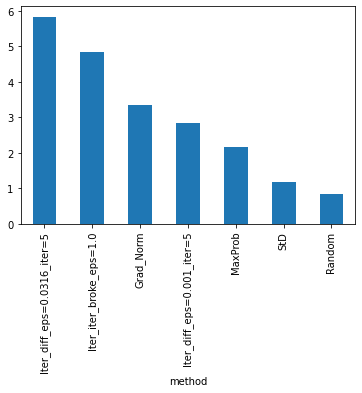

In [29]:

(7-pivot_ROC_RC.sort_values('rank')['rank']).plot(kind='bar')


In [22]:
glob_dataset_name = 'UEA'
table_ROC_RC = pd.read_csv(f'results/TS2Vec/{glob_dataset_name}_ROC_RC_.csv', index_col=0)
table_ROC_RC.drop(columns=['metric'], inplace=True)
table_ROC_RC

pivot_ROC_RC = table_ROC_RC.pivot(index="method", columns='dataset', values='value').drop(index=['Predictive entropy'])
pivot_ROC_RC['rank'] = pivot_ROC_RC.rank(ascending=False).T.mean()

pivot_ROC_RC = pivot_ROC_RC[['rank'] + pivot_ROC_RC.columns[:-1].tolist()]
pivot_ROC_RC.sort_values('rank')

dataset,rank,FaceDetection,FingerMovements,Heartbeat,MotorImagery,SelfRegulationSCP1,SelfRegulationSCP2
method,,,,,,,
Iter_iter_broke_eps=1.0,1.000000,0.658785,0.556101,0.914105,0.640853,0.934455,0.678687
Grad_Norm,2.333333,0.528910,0.524973,0.698173,0.582525,0.932916,0.659907
MaxProb,3.333333,0.512293,0.521494,0.785212,0.443262,0.930462,0.586142
StD,4.166667,0.510330,0.383164,0.689960,0.555337,0.924207,0.594206
Random,4.500000,0.506238,0.446073,0.711383,0.481282,0.840644,0.578237
Iter_diff_eps=0.001_iter=5,5.666667,0.373792,0.397162,0.684200,0.288951,0.890225,0.525560
Iter_diff_eps=0.0316_iter=5,7.000000,0.322111,0.194668,0.517618,0.241695,0.625208,0.404932


In [23]:
glob_dataset_name = 'UEA'
table_ROC_RC = pd.read_csv(f'results/TS2Vec/{glob_dataset_name}_ROC_RC__inverse.csv', index_col=0)
table_ROC_RC.drop(columns=['metric'], inplace=True)
table_ROC_RC

pivot_ROC_RC = table_ROC_RC.pivot(index="method", columns='dataset', values='value').drop(index=['Predictive entropy'])
pivot_ROC_RC['rank'] = pivot_ROC_RC.rank(ascending=False).T.mean()

pivot_ROC_RC = pivot_ROC_RC[['rank'] + pivot_ROC_RC.columns[:-1].tolist()]
pivot_ROC_RC.sort_values('rank')

dataset,rank,FaceDetection,FingerMovements,Heartbeat,MotorImagery,SelfRegulationSCP1,SelfRegulationSCP2
method,,,,,,,
Iter_diff_eps=0.0316_iter=5,1.166667,0.691774,0.728567,0.885674,0.749442,0.974023,0.741142
Iter_iter_broke_eps=1.0,2.166667,0.658785,0.556101,0.914105,0.640853,0.934455,0.678687
Grad_Norm,3.666667,0.536951,0.526429,0.692546,0.575661,0.934831,0.675608
Iter_diff_eps=0.001_iter=5,4.166667,0.634243,0.487307,0.728771,0.652553,0.802464,0.650301
MaxProb,4.833333,0.512293,0.521494,0.785212,0.443262,0.930462,0.586142
StD,5.833333,0.510330,0.383164,0.689960,0.555337,0.924207,0.594206
Random,6.166667,0.506775,0.452777,0.710666,0.489969,0.840501,0.571075


In [5]:
pivot_ROC_RC

dataset,rank,FaceDetection,FingerMovements,Heartbeat,MotorImagery,SelfRegulationSCP1,SelfRegulationSCP2
method,,,,,,,
Grad_Norm,2.500000,0.528120,0.523211,0.724333,0.550460,0.930655,0.626059
Iter_diff_eps=0.001_iter=5,6.666667,0.373792,0.397162,0.684200,0.288951,0.890225,0.525560
Iter_diff_eps=0.0316_iter=5,8.000000,0.322111,0.194668,0.517618,0.241695,0.625208,0.404932
Iter_iter_broke_eps=1.0,1.000000,0.658785,0.556101,0.914105,0.640853,0.934455,0.678687
MaxProb,3.833333,0.512293,0.521494,0.785212,0.443262,0.930462,0.586142
Predictive entropy,3.833333,0.512293,0.521494,0.785212,0.443262,0.930462,0.586142
Random,5.500000,0.506311,0.445345,0.711050,0.493926,0.838292,0.574468
StD,4.666667,0.510330,0.383164,0.689960,0.555337,0.924207,0.594206


In [6]:
pivot_ROC_RC.rank(ascending=False)

dataset,rank,FaceDetection,FingerMovements,Heartbeat,MotorImagery,SelfRegulationSCP1,SelfRegulationSCP2
method,,,,,,,
Grad_Norm,7.0,2.0,2.0,4.0,3.0,2.0,2.0
Iter_diff_eps=0.001_iter=5,2.0,7.0,6.0,7.0,7.0,6.0,7.0
Iter_diff_eps=0.0316_iter=5,1.0,8.0,8.0,8.0,8.0,8.0,8.0
Iter_iter_broke_eps=1.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0
MaxProb,5.5,3.5,3.5,2.5,5.5,3.5,4.5
Predictive entropy,5.5,3.5,3.5,2.5,5.5,3.5,4.5
Random,3.0,6.0,5.0,5.0,4.0,7.0,6.0
StD,4.0,5.0,7.0,6.0,2.0,5.0,3.0
